<a href="https://colab.research.google.com/github/dla9944/2023_God_damn_deeplearning/blob/master/itworker_layoff_colab_ver3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 필요한 패키지 load
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import tqdm


# 분류 종류

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [ ]:
from fasteda import fast_eda

In [ ]:
fast_eda(df)

DataFrame Head:


,company,total_layoffs,impacted_workforce_percentage,reported_date,industry,headquarter_location,sources,status
260,100 Thieves,12,Unclear,2023-01-10,"eSports, Media",Los Angeles,Dexerto,Private
443,2U,Unclear,20,2022-08-01,Edtech,"Hyattsville, MD",Inside Higher Ed,Public
55,6sense,150,10,2022-10-12,"Artificial Intelligence, Machine Learning",San Francisco,MoneyControl,Private


DataFrame Tail:


,company,total_layoffs,impacted_workforce_percentage,reported_date,industry,headquarter_location,sources,status
66,impact.com,Unclear,10,2022-08-25,Digital marketing,"Santa Barbara, CA",impact.com,Private
393,nCino,100,7,2023-01-18,"Fintech, software","Wilmington, NC",Port City Daily,Public
346,realtor.com,Unclear,Unclear,2022-09-08,Proptech,"Santa Clara, CA",SFGate,Private


----------------------------------------------------------------------------------------------------
Missing values:


,0


----------------------------------------------------------------------------------------------------
Shape of DataFrame:

(489, 8)

----------------------------------------------------------------------------------------------------
DataFrame Info:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 489 entries, 260 to 346
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   company                        489 non-null    object        
 1   total_layoffs                  489 non-null    object        
 2   impacted_workforce_percentage  489 non-null    object        
 3   reported_date                  489 non-null    datetime64[ns]
 4   industry                       489 non-null    object        
 5   headquarter_location           489 non-null    object        
 6   sources                        489 non-null    object        
 7   status                         489 n

/usr/local/lib/python3.8/dist-packages/scipy/stats/stats.py:1107: RuntimeWarning: Mean of empty slice.
  mean = a.mean(axis, keepdims=True)
/usr/local/lib/python3.8/dist-packages/numpy/core/_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.8/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.8/dist-packages/scipy/stats/stats.py:1216: RuntimeWarning: Mean of empty slice.
  mean = a.mean(axis, keepdims=True)
/usr/local/lib/python3.8/dist-packages/fasteda/__init__.py:80: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True

ValueError: ignored

----------------------------------------------------------------------------------------------------
DataFrame Correlation:



ValueError: ignored

<Figure size 864x576 with 0 Axes>

In [ ]:
df = pd.read_csv('./tech_layoffs.csv')
df

,company,total_layoffs,impacted_workforce_percentage,reported_date,industry,headquarter_location,sources,status,additional_notes
0,C2FO,20,2,12/9/2022,"Fintech, payments","Leawood, KS",Kansas City Business Journal,Private,NaN
1,VideoAmp,Unclear,2,9/19/2022,Advertising platforms,Los Angeles,Company memo,Private,NaN
2,Amperity,13,3,8/20/2022,"Saas, analytics",Seattle,Geekwire,Private,NaN
3,Addepar,20,3,1/18/2023,"fintech, data analytics","Mountain View, CA",Fortune,Private,NaN
4,Thirty Madison,24,3,5/13/2022,Health Care,New York,Axios,Private,"Per Axios, 22 of the employees laid off were f..."
...,...,...,...,...,...,...,...,...,...
484,Salesforce,9090,Unclear,1/4/2023,"enterprise tech, analytics",San Francisco,New York Times,Public,NaN
485,Oracle,Unclear,Unclear,8/1/2022,"SaaS, enterprise software",Austin,The Information,Public,The Information reported thousands of people w...
486,LivePerson,Unclear,Unclear,9/15/2022,Customer service,New York,LinkedIn,Public,NaN
487,Skillz,Unclear,Unclear,8/29/2022,"Mobile Apps, Gaming",San Francisco,Seeking Alpha,Public,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 0 to 488
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   company                        489 non-null    object
 1   total_layoffs                  489 non-null    object
 2   impacted_workforce_percentage  489 non-null    object
 3   reported_date                  489 non-null    object
 4   industry                       489 non-null    object
 5   headquarter_location           489 non-null    object
 6   sources                        489 non-null    object
 7   status                         489 non-null    object
 8   additional_notes               22 non-null     object
dtypes: object(9)
memory usage: 34.5+ KB


### 한글 column 설명

* company : 회사명
* total_layoffs : 현재까지 layoff(정리해고) 인원 수
* impacted_workforch_percentage : 영향을 받는 인력 비율(2022년 6월전)
* reported_date : 최초 정리해고 혹은 정리해고 계획이 발표된 때
* industry : 회사의 운영분야에 대한 추가적인 정보
* headquarter_location : 본사 위치
* sources : 데이터 출처
* status : IPO(기업 정보공개)에 의한 공공/사기업 여부
* additional_notes : 추가적인 메모

In [ ]:
df.describe(include = 'O')
# df.describe()
# 결측치는 Unclear

,company,total_layoffs,impacted_workforce_percentage,reported_date,industry,headquarter_location,sources,status,additional_notes
count,489,489,489,489,489,489,489,489,22
unique,477,150,50,187,289,134,221,2,22
top,DataRobot,Unclear,Unclear,1/11/2023,Fintech,San Francisco,TechCrunch,Private,"Per Axios, 22 of the employees laid off were f..."
freq,2,182,133,12,24,136,52,370,1


In [ ]:
# 불필요한 additional_notes 열 삭제
df.drop(['additional_notes'], axis = 1, inplace = True)

In [ ]:
df = df.sort_values(by='company')
df

,company,total_layoffs,impacted_workforce_percentage,reported_date,industry,headquarter_location,sources,status
260,100 Thieves,12,Unclear,1/10/2023,"eSports, Media",Los Angeles,Dexerto,Private
443,2U,Unclear,20,8/1/2022,Edtech,"Hyattsville, MD",Inside Higher Ed,Public
55,6sense,150,10,10/12/2022,"Artificial Intelligence, Machine Learning",San Francisco,MoneyControl,Private
67,80 Acres Farms,Unclear,10,1/18/2023,"indoor farming, agtech","Hamilton, OH",CincinnatiInno,Private
394,8x8,155,7,1/18/2023,"telecommunications, enterprise software","San Jose, CA",Channel Futures,Public
...,...,...,...,...,...,...,...,...
324,Zywave,Unclear,Unclear,12/7/2022,"Insurtech, cloud computing",Milwaukee,Milwaukee Business Journal,Private
405,iRobot,140,10,8/5/2022,"artificial intelligence, robotics","Bedford, MA",Geekwire,Public
66,impact.com,Unclear,10,8/25/2022,Digital marketing,"Santa Barbara, CA",impact.com,Private
393,nCino,100,7,1/18/2023,"Fintech, software","Wilmington, NC",Port City Daily,Public


In [ ]:
df.iloc[1:,:]

,company,total_layoffs,impacted_workforce_percentage,reported_date,industry,headquarter_location,sources,status
443,2U,Unclear,20,8/1/2022,Edtech,"Hyattsville, MD",Inside Higher Ed,Public
55,6sense,150,10,10/12/2022,"Artificial Intelligence, Machine Learning",San Francisco,MoneyControl,Private
67,80 Acres Farms,Unclear,10,1/18/2023,"indoor farming, agtech","Hamilton, OH",CincinnatiInno,Private
394,8x8,155,7,1/18/2023,"telecommunications, enterprise software","San Jose, CA",Channel Futures,Public
68,98point6,Unclear,10,7/21/2022,Health Care,Seattle,GeekWire,Private
...,...,...,...,...,...,...,...,...
324,Zywave,Unclear,Unclear,12/7/2022,"Insurtech, cloud computing",Milwaukee,Milwaukee Business Journal,Private
405,iRobot,140,10,8/5/2022,"artificial intelligence, robotics","Bedford, MA",Geekwire,Public
66,impact.com,Unclear,10,8/25/2022,Digital marketing,"Santa Barbara, CA",impact.com,Private
393,nCino,100,7,1/18/2023,"Fintech, software","Wilmington, NC",Port City Daily,Public


In [ ]:
df['reported_date'] = pd.to_datetime(df['reported_date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 489 entries, 260 to 346
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   company                        489 non-null    object        
 1   total_layoffs                  489 non-null    object        
 2   impacted_workforce_percentage  489 non-null    object        
 3   reported_date                  489 non-null    datetime64[ns]
 4   industry                       489 non-null    object        
 5   headquarter_location           489 non-null    object        
 6   sources                        489 non-null    object        
 7   status                         489 non-null    object        
dtypes: datetime64[ns](1), object(7)
memory usage: 34.4+ KB


In [ ]:
pd.options.display.float_format = "{:.4f}".format

In [ ]:
# industry 별로 어떻게 정리해고가 들어가고 있을지 분석
df.industry.value_counts()

Fintech                                24
Health Care                            17
PropTech                               15
E-commerce                             13
Cybersecurity                          10
                                       ..
Health care, pharmaceuticals            1
ecommerce, retail                       1
cybersecurity, cloud infrastructure     1
food and beverage                       1
Fintech, software                       1
Name: industry, Length: 289, dtype: int64

In [ ]:
industry_class = pd.get_dummies(df, columns=['industry'])
industry_class

,company,total_layoffs,impacted_workforce_percentage,reported_date,headquarter_location,sources,status,industry_3D Printing,industry_AI,"industry_AI, Sales",...,"industry_retail, e-commerce","industry_robotics, AI","industry_security, enterprise software",industry_shipping and logistics,"industry_social impact, company benefits","industry_social impact, finance","industry_telecommunications, enterprise software",industry_telehealth,"industry_telehealth, wellness",industry_video games
260,100 Thieves,12,Unclear,2023-01-10,Los Angeles,Dexerto,Private,0,0,0,...,0,0,0,0,0,0,0,0,0,0
443,2U,Unclear,20,2022-08-01,"Hyattsville, MD",Inside Higher Ed,Public,0,0,0,...,0,0,0,0,0,0,0,0,0,0
55,6sense,150,10,2022-10-12,San Francisco,MoneyControl,Private,0,0,0,...,0,0,0,0,0,0,0,0,0,0
67,80 Acres Farms,Unclear,10,2023-01-18,"Hamilton, OH",CincinnatiInno,Private,0,0,0,...,0,0,0,0,0,0,0,0,0,0
394,8x8,155,7,2023-01-18,"San Jose, CA",Channel Futures,Public,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324,Zywave,Unclear,Unclear,2022-12-07,Milwaukee,Milwaukee Business Journal,Private,0,0,0,...,0,0,0,0,0,0,0,0,0,0
405,iRobot,140,10,2022-08-05,"Bedford, MA",Geekwire,Public,0,0,0,...,0,0,0,0,0,0,0,0,0,0
66,impact.com,Unclear,10,2022-08-25,"Santa Barbara, CA",impact.com,Private,0,0,0,...,0,0,0,0,0,0,0,0,0,0
393,nCino,100,7,2023-01-18,"Wilmington, NC",Port City Daily,Public,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# industry, total_layoffs 이외의 데이터 제외
df1 = df.copy()
industry_class.drop(['company', 'impacted_workforce_percentage', 'reported_date','sources','status'], axis = 1, inplace = True)
industry_class

,total_layoffs,headquarter_location,industry_3D Printing,industry_AI,"industry_AI, Sales","industry_AI, analytics","industry_AI, big data","industry_AI, coding","industry_AI, enterprise software","industry_AI, health care",...,"industry_retail, e-commerce","industry_robotics, AI","industry_security, enterprise software",industry_shipping and logistics,"industry_social impact, company benefits","industry_social impact, finance","industry_telecommunications, enterprise software",industry_telehealth,"industry_telehealth, wellness",industry_video games
260,12,Los Angeles,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
443,Unclear,"Hyattsville, MD",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
55,150,San Francisco,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
67,Unclear,"Hamilton, OH",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
394,155,"San Jose, CA",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324,Unclear,Milwaukee,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
405,140,"Bedford, MA",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
66,Unclear,"Santa Barbara, CA",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
393,100,"Wilmington, NC",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Unclear조정 (182개)
industry_class = industry_class.sort_values(by='total_layoffs')
industry_class.tail(182)

,total_layoffs,headquarter_location,industry_3D Printing,industry_AI,"industry_AI, Sales","industry_AI, analytics","industry_AI, big data","industry_AI, coding","industry_AI, enterprise software","industry_AI, health care",...,"industry_retail, e-commerce","industry_robotics, AI","industry_security, enterprise software",industry_shipping and logistics,"industry_social impact, company benefits","industry_social impact, finance","industry_telecommunications, enterprise software",industry_telehealth,"industry_telehealth, wellness",industry_video games
341,Unclear,"San Carlos, CA",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
365,Unclear,Portland,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
430,Unclear,"Oakland, CA",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
247,Unclear,"Palo Alto, CA",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
158,Unclear,San Francisco,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,Unclear,New York,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
426,Unclear,San Francisco,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
431,Unclear,"Bellevue, WA",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
486,Unclear,New York,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# 실제 본 데이터에는 정리해고가 '실제로' 발생한 회사를 대상으로 했기 때문에 최소값인 1로 지정
industry_class = industry_class.replace({'total_layoffs': 'Unclear'}, 1)
industry_class


,total_layoffs,headquarter_location,industry_3D Printing,industry_AI,"industry_AI, Sales","industry_AI, analytics","industry_AI, big data","industry_AI, coding","industry_AI, enterprise software","industry_AI, health care",...,"industry_retail, e-commerce","industry_robotics, AI","industry_security, enterprise software",industry_shipping and logistics,"industry_social impact, company benefits","industry_social impact, finance","industry_telecommunications, enterprise software",industry_telehealth,"industry_telehealth, wellness",industry_video games
86,10,"Stamford, CT",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
262,100,Boston,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
93,100,San Francisco,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
264,100,San Francisco,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
385,100,New York,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,1,New York,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
426,1,San Francisco,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
431,1,"Bellevue, WA",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
486,1,New York,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# total layoffs 타입을 int로 바꿈
industry_class = industry_class.astype({'total_layoffs':'int'})
industry_class

,total_layoffs,headquarter_location,industry_3D Printing,industry_AI,"industry_AI, Sales","industry_AI, analytics","industry_AI, big data","industry_AI, coding","industry_AI, enterprise software","industry_AI, health care",...,"industry_retail, e-commerce","industry_robotics, AI","industry_security, enterprise software",industry_shipping and logistics,"industry_social impact, company benefits","industry_social impact, finance","industry_telecommunications, enterprise software",industry_telehealth,"industry_telehealth, wellness",industry_video games
86,10,"Stamford, CT",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
262,100,Boston,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
93,100,San Francisco,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
264,100,San Francisco,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
385,100,New York,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,1,New York,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
426,1,San Francisco,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
431,1,"Bellevue, WA",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
486,1,New York,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
industry_class.info(all)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 489 entries, 86 to 346
Data columns (total 291 columns):
 #    Column                                                        Dtype 
---   ------                                                        ----- 
 0    total_layoffs                                                 int64 
 1    headquarter_location                                          object
 2    industry_3D Printing                                          uint8 
 3    industry_AI                                                   uint8 
 4    industry_AI, Sales                                            uint8 
 5    industry_AI, analytics                                        uint8 
 6    industry_AI, big data                                         uint8 
 7    industry_AI, coding                                           uint8 
 8    industry_AI, enterprise software                              uint8 
 9    industry_AI, health care                                      

In [ ]:
industry_class.tail(182)
# 변경된 것 확인

,total_layoffs,headquarter_location,industry_3D Printing,industry_AI,"industry_AI, Sales","industry_AI, analytics","industry_AI, big data","industry_AI, coding","industry_AI, enterprise software","industry_AI, health care",...,"industry_retail, e-commerce","industry_robotics, AI","industry_security, enterprise software",industry_shipping and logistics,"industry_social impact, company benefits","industry_social impact, finance","industry_telecommunications, enterprise software",industry_telehealth,"industry_telehealth, wellness",industry_video games
341,1,"San Carlos, CA",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
365,1,Portland,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
430,1,"Oakland, CA",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
247,1,"Palo Alto, CA",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
158,1,San Francisco,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,1,New York,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
426,1,San Francisco,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
431,1,"Bellevue, WA",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
486,1,New York,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# 산업군, 본사 위치 제외 (label로 사용)
industry_class.iloc[:,2:]

,industry_3D Printing,industry_AI,"industry_AI, Sales","industry_AI, analytics","industry_AI, big data","industry_AI, coding","industry_AI, enterprise software","industry_AI, health care","industry_AI, image recognition","industry_AR, health care",...,"industry_retail, e-commerce","industry_robotics, AI","industry_security, enterprise software",industry_shipping and logistics,"industry_social impact, company benefits","industry_social impact, finance","industry_telecommunications, enterprise software",industry_telehealth,"industry_telehealth, wellness",industry_video games
86,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
262,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
93,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
264,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
385,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
426,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
431,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
486,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# 특정 산업 포함여부 1/0로 치환
for col_name in industry_class.iloc[:,2:].columns:
    industry_class[col_name] = industry_class[col_name]*industry_class['total_layoffs']

In [ ]:
industry_class.head(100)

,total_layoffs,headquarter_location,industry_3D Printing,industry_AI,"industry_AI, Sales","industry_AI, analytics","industry_AI, big data","industry_AI, coding","industry_AI, enterprise software","industry_AI, health care",...,"industry_retail, e-commerce","industry_robotics, AI","industry_security, enterprise software",industry_shipping and logistics,"industry_social impact, company benefits","industry_social impact, finance","industry_telecommunications, enterprise software",industry_telehealth,"industry_telehealth, wellness",industry_video games
86,10,"Stamford, CT",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
262,100,Boston,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
93,100,San Francisco,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
264,100,San Francisco,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
385,100,New York,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417,180,New York,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
399,180,San Francisco,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
277,180,New York,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
378,18000,Seattle,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
industry_class.isna().mean()

total_layoffs                                      0.0000
headquarter_location                               0.0000
industry_3D Printing                               0.0000
industry_AI                                        0.0000
industry_AI, Sales                                 0.0000
                                                    ...  
industry_social impact, finance                    0.0000
industry_telecommunications, enterprise software   0.0000
industry_telehealth                                0.0000
industry_telehealth, wellness                      0.0000
industry_video games                               0.0000
Length: 291, dtype: float64

In [ ]:
# 회사의 본사 위치별로 정리해고된 크기 확인
industry_agg = industry_class.groupby('headquarter_location').sum()
industry_agg

,total_layoffs,industry_3D Printing,industry_AI,"industry_AI, Sales","industry_AI, analytics","industry_AI, big data","industry_AI, coding","industry_AI, enterprise software","industry_AI, health care","industry_AI, image recognition",...,"industry_retail, e-commerce","industry_robotics, AI","industry_security, enterprise software",industry_shipping and logistics,"industry_social impact, company benefits","industry_social impact, finance","industry_telecommunications, enterprise software",industry_telehealth,"industry_telehealth, wellness",industry_video games
headquarter_location,,,,,,,,,,,,,,,,,,,,,
"Alameda, CA",1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"Alpharetta, GA",1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Atlanta,1115,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Austin,242,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"Austin, TX",95,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Walpole, MA",1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"Washington, DC",171,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"Waterford, MI",1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
industry_agg.info(all)

<class 'pandas.core.frame.DataFrame'>
Index: 134 entries, Alameda, CA to Wilmington, NC
Data columns (total 290 columns):
 #    Column                                                        Dtype
---   ------                                                        -----
 0    total_layoffs                                                 int64
 1    industry_3D Printing                                          int64
 2    industry_AI                                                   int64
 3    industry_AI, Sales                                            int64
 4    industry_AI, analytics                                        int64
 5    industry_AI, big data                                         int64
 6    industry_AI, coding                                           int64
 7    industry_AI, enterprise software                              int64
 8    industry_AI, health care                                      int64
 9    industry_AI, image recognition                            

In [ ]:
# 표준화 스케일링
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [ ]:
# 스케일링을 하고나서 데이터 조회
scaled = scaler.fit_transform(industry_agg)
scaled

array([[-0.24839921, -0.086711  , -0.086711  , ..., -0.086711  ,
        -0.086711  , -0.086711  ],
       [-0.24839921, -0.086711  , -0.086711  , ..., -0.086711  ,
        -0.086711  , -0.086711  ],
       [ 0.01990012, -0.086711  , -0.086711  , ..., -0.086711  ,
        -0.086711  , -0.086711  ],
       ...,
       [-0.24839921, -0.086711  , -0.086711  , ..., -0.086711  ,
        -0.086711  , -0.086711  ],
       [-0.23732043, -0.086711  , -0.086711  , ..., -0.086711  ,
        -0.086711  , -0.086711  ],
       [-0.22455574, -0.086711  , -0.086711  , ..., -0.086711  ,
        -0.086711  , -0.086711  ]])

In [ ]:
scaled_df = pd.DataFrame(scaled, columns=industry_agg.columns,
                         index=industry_agg.index)
scaled_df

,total_layoffs,industry_3D Printing,industry_AI,"industry_AI, Sales","industry_AI, analytics","industry_AI, big data","industry_AI, coding","industry_AI, enterprise software","industry_AI, health care","industry_AI, image recognition",...,"industry_retail, e-commerce","industry_robotics, AI","industry_security, enterprise software",industry_shipping and logistics,"industry_social impact, company benefits","industry_social impact, finance","industry_telecommunications, enterprise software",industry_telehealth,"industry_telehealth, wellness",industry_video games
headquarter_location,,,,,,,,,,,,,,,,,,,,,
"Alameda, CA",-0.2484,-0.0867,-0.0867,-0.0867,-0.0867,-0.0867,-0.0867,-0.1231,-0.0867,-0.0867,...,-0.0867,-0.0867,-0.0867,-0.0867,-0.0867,-0.0867,-0.0867,-0.0867,-0.0867,-0.0867
"Alpharetta, GA",-0.2484,-0.0867,-0.0867,-0.0867,-0.0867,-0.0867,-0.0867,-0.1231,-0.0867,-0.0867,...,-0.0867,-0.0867,-0.0867,-0.0867,-0.0867,-0.0867,-0.0867,-0.0867,-0.0867,-0.0867
Atlanta,0.0199,-0.0867,-0.0867,-0.0867,-0.0867,-0.0867,-0.0867,-0.1231,-0.0867,-0.0867,...,-0.0867,-0.0867,-0.0867,-0.0867,-0.0867,-0.0867,-0.0867,-0.0867,-0.0867,-0.0867
Austin,-0.1904,-0.0867,-0.0867,-0.0867,-0.0867,-0.0867,-0.0867,-0.1231,-0.0867,-0.0867,...,-0.0867,-0.0867,-0.0867,-0.0867,-0.0867,-0.0867,-0.0867,-0.0867,-0.0867,-0.0867
"Austin, TX",-0.2258,-0.0867,-0.0867,-0.0867,-0.0867,-0.0867,-0.0867,-0.1231,-0.0867,-0.0867,...,-0.0867,-0.0867,-0.0867,-0.0867,-0.0867,-0.0867,-0.0867,-0.0867,-0.0867,-0.0867
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Walpole, MA",-0.2484,-0.0867,-0.0867,-0.0867,-0.0867,-0.0867,-0.0867,-0.1231,-0.0867,-0.0867,...,-0.0867,-0.0867,-0.0867,-0.0867,-0.0867,-0.0867,-0.0867,-0.0867,-0.0867,-0.0867
"Washington, DC",-0.2075,-0.0867,-0.0867,-0.0867,-0.0867,-0.0867,-0.0867,-0.1231,-0.0867,-0.0867,...,-0.0867,-0.0867,-0.0867,-0.0867,-0.0867,-0.0867,-0.0867,-0.0867,-0.0867,-0.0867
"Waterford, MI",-0.2484,-0.0867,-0.0867,-0.0867,-0.0867,-0.0867,-0.0867,-0.1231,-0.0867,-0.0867,...,-0.0867,-0.0867,-0.0867,-0.0867,-0.0867,-0.0867,-0.0867,-0.0867,-0.0867,-0.0867


In [ ]:
# KMeans 표준화 - elbow
distance= []
for k in range(1, 21):
    k_model = KMeans(n_clusters = k, random_state = 10)
    k_model.fit(scaled_df)
    distance.append(k_model.inertia_)

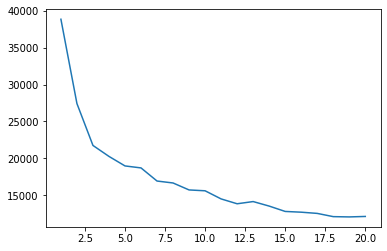

In [ ]:
sns.lineplot(x=range(1,21), y = distance)

In [ ]:
# KMeans 표준화 - elbow
distance= []
for k in range(1, 8):
    k_model = KMeans(n_clusters = k, random_state = 10)
    k_model.fit(scaled_df)
    distance.append(k_model.inertia_)

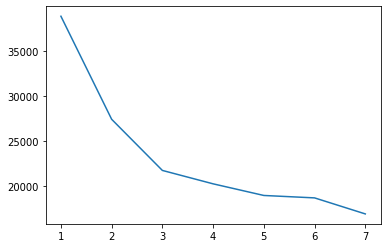

In [ ]:
sns.lineplot(x=range(1,8), y = distance)

In [ ]:
scaled_df = scaled_df.sort_values(by='total_layoffs', ascending = False)
scaled_df

,total_layoffs,industry_3D Printing,industry_AI,"industry_AI, Sales","industry_AI, analytics","industry_AI, big data","industry_AI, coding","industry_AI, enterprise software","industry_AI, health care","industry_AI, image recognition",...,"industry_retail, e-commerce","industry_robotics, AI","industry_security, enterprise software",industry_shipping and logistics,"industry_social impact, company benefits","industry_social impact, finance","industry_telecommunications, enterprise software",industry_telehealth,"industry_telehealth, wellness",industry_video games
headquarter_location,,,,,,,,,,,,,,,,,,,,,
San Francisco,7.1674,-0.0867,-0.0867,11.5326,-0.0867,11.5326,11.5326,8.1240,-0.0867,11.5326,...,-0.0867,-0.0867,11.5326,11.5326,-0.0867,-0.0867,-0.0867,-0.0867,-0.0867,11.5326
Seattle,7.0930,-0.0867,-0.0867,-0.0867,-0.0867,-0.0867,-0.0867,-0.1231,-0.0867,-0.0867,...,-0.0867,-0.0867,-0.0867,-0.0867,-0.0867,-0.0867,-0.0867,-0.0867,-0.0867,-0.0867
New York,3.5107,-0.0867,11.5326,-0.0867,11.5326,-0.0867,-0.0867,-0.1231,-0.0867,-0.0867,...,-0.0867,-0.0867,-0.0867,-0.0867,11.5326,-0.0867,-0.0867,-0.0867,-0.0867,-0.0867
"Mountain View, CA",2.6769,-0.0867,-0.0867,-0.0867,-0.0867,-0.0867,-0.0867,-0.1231,-0.0867,-0.0867,...,-0.0867,11.5326,-0.0867,-0.0867,-0.0867,-0.0867,-0.0867,-0.0867,-0.0867,-0.0867
"Menlo Park, CA",2.4006,-0.0867,-0.0867,-0.0867,-0.0867,-0.0867,-0.0867,-0.1231,-0.0867,-0.0867,...,-0.0867,-0.0867,-0.0867,-0.0867,-0.0867,-0.0867,-0.0867,-0.0867,-0.0867,-0.0867
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Oakland,-0.2484,-0.0867,-0.0867,-0.0867,-0.0867,-0.0867,-0.0867,-0.1231,-0.0867,-0.0867,...,-0.0867,-0.0867,-0.0867,-0.0867,-0.0867,-0.0867,-0.0867,-0.0867,-0.0867,-0.0867
"Oakland, CA",-0.2484,-0.0867,-0.0867,-0.0867,-0.0867,-0.0867,-0.0867,-0.1231,-0.0867,-0.0867,...,-0.0867,-0.0867,-0.0867,-0.0867,-0.0867,-0.0867,-0.0867,-0.0867,-0.0867,-0.0867
Phoenix,-0.2484,-0.0867,-0.0867,-0.0867,-0.0867,-0.0867,-0.0867,-0.1231,-0.0867,-0.0867,...,-0.0867,-0.0867,-0.0867,-0.0867,-0.0867,-0.0867,-0.0867,-0.0867,-0.0867,-0.0867


In [ ]:
k_model = KMeans(n_clusters=3, random_state=12)
labels = k_model.fit_predict(scaled_df)
k_model

KMeans(n_clusters=3, random_state=12)

In [ ]:
scaled_df['label'] = labels
scaled_df

,total_layoffs,industry_3D Printing,industry_AI,"industry_AI, Sales","industry_AI, analytics","industry_AI, big data","industry_AI, coding","industry_AI, enterprise software","industry_AI, health care","industry_AI, image recognition","industry_AR, health care","industry_Adtech, digital marketing",industry_Advertising platforms,"industry_AgTech, food and beverage",industry_Analytics,industry_Artificial Intelligence,"industry_Artificial Intelligence, Machine Learning","industry_Artificial intelligence, machine learning","industry_Artificial intelligence, recruiting","industry_Auto, E-commerce","industry_Automotive, Ecommerce","industry_Automotive, electric vehicles",industry_Autonomous vehicles,industry_Beauty,industry_Beauty tech,"industry_Big data, cloud computing","industry_Big tech, internet services","industry_Blockchain, cryptocurrency",industry_Business development,"industry_CRM, IT","industry_CRM, enterprise software",industry_Cannabis,"industry_Career planning, social network",industry_CivicTech,"industry_CleanTech, energy",industry_Cloud Infrastructure,"industry_Cloud Infrastructure, health care","industry_Cloud computing, IT","industry_Cloud computing, e-commerce","industry_Cloud computing, web hosting","industry_Cloud services, cybersecurity","industry_Collaboration, productivity",industry_Communications Infrastructure,industry_Content marketing,industry_Conversational AI,industry_Coworking,industry_Crowdfunding,industry_Crypto,"industry_Crypto, NFT marketplace",industry_Cryptocurrency,"industry_Cryptocurrency, FinTech","industry_Cryptocurrency, blockchain",industry_Customer service,industry_Cybersecurity,"industry_Cybersecurity, enterprise software",industry_Data Analytics,"industry_Data analytics, cloud services","industry_Data science, enterprise",industry_Data storage,industry_DevOps,"industry_Developer APIs, enterprise software",industry_Digital Marketing,industry_Digital marketing,"industry_Digital media, journalism",industry_E-commerce,"industry_E-commerce, DTC","industry_E-commerce, Delivery","industry_E-commerce, Logistics","industry_E-commerce, SaaS","industry_E-commerce, consumer lending","industry_E-commerce, fashion","industry_E-commerce, marketplace","industry_E-commerce, retail","industry_E-commerce, ticketing","industry_Ecommerce, Fashion",industry_EdTech,"industry_EdTech, IT",industry_Edtech,industry_Elder Care,industry_Email Software,"industry_Employee Benefits, HR Tech",industry_Enterprise Communication,industry_Enterprise Software,"industry_Enterprise applications, HR","industry_Enterprise software, Management information systems","industry_Enterprise software, customer service","industry_Enterprise software, e-commerce",industry_Esports/Video Games,"industry_Fashion, e-commerce",industry_FinTech,"industry_FinTech, PropTech","industry_FinTech, loan repayments",industry_Fintech,"industry_Fintech, AI","industry_Fintech, Crypto","industry_Fintech, SaaS","industry_Fintech, analytics","industry_Fintech, banking","industry_Fintech, loans","industry_Fintech, payments","industry_Fintech, proptech","industry_Fintech, software",industry_Fitness,industry_Fitness/Digital Health,"industry_Food Tech, Software, Grocery Tech","industry_Food delivery, ecommerce",industry_Foodtech,industry_Gaming,"industry_Grocery, e-commerce, delivery service",industry_HR Tech,industry_Health Care,"industry_Health Care, Biotech","industry_Health Care, Diagnostics",industry_Health care,"industry_Health care, analytics","industry_Health care, nutrition","industry_Health care, pharmaceuticals","industry_Health care, predictive analytics","industry_Home decor, PropTech",industry_Hospitality,"industry_Human resources, recruiting",industry_IT Infrastructure,"industry_IT, future of work","industry_IT, software",industry_Identity verification,industry_InsurTech,"industry_Insurance, fintech",industry_Insurtech,"industry_Insurtech, cloud computing","industry_Insurtech, fintech","industry_Insurtech, machine learning","industry_Insurtech, tr

In [ ]:
scaled_df_mean = scaled_df.groupby('label').mean()
scaled_df_mean # label로 따로 분류시킴

,total_layoffs,industry_3D Printing,industry_AI,"industry_AI, Sales","industry_AI, analytics","industry_AI, big data","industry_AI, coding","industry_AI, enterprise software","industry_AI, health care","industry_AI, image recognition","industry_AR, health care","industry_Adtech, digital marketing",industry_Advertising platforms,"industry_AgTech, food and beverage",industry_Analytics,industry_Artificial Intelligence,"industry_Artificial Intelligence, Machine Learning","industry_Artificial intelligence, machine learning","industry_Artificial intelligence, recruiting","industry_Auto, E-commerce","industry_Automotive, Ecommerce","industry_Automotive, electric vehicles",industry_Autonomous vehicles,industry_Beauty,industry_Beauty tech,"industry_Big data, cloud computing","industry_Big tech, internet services","industry_Blockchain, cryptocurrency",industry_Business development,"industry_CRM, IT","industry_CRM, enterprise software",industry_Cannabis,"industry_Career planning, social network",industry_CivicTech,"industry_CleanTech, energy",industry_Cloud Infrastructure,"industry_Cloud Infrastructure, health care","industry_Cloud computing, IT","industry_Cloud computing, e-commerce","industry_Cloud computing, web hosting","industry_Cloud services, cybersecurity","industry_Collaboration, productivity",industry_Communications Infrastructure,industry_Content marketing,industry_Conversational AI,industry_Coworking,industry_Crowdfunding,industry_Crypto,"industry_Crypto, NFT marketplace",industry_Cryptocurrency,"industry_Cryptocurrency, FinTech","industry_Cryptocurrency, blockchain",industry_Customer service,industry_Cybersecurity,"industry_Cybersecurity, enterprise software",industry_Data Analytics,"industry_Data analytics, cloud services","industry_Data science, enterprise",industry_Data storage,industry_DevOps,"industry_Developer APIs, enterprise software",industry_Digital Marketing,industry_Digital marketing,"industry_Digital media, journalism",industry_E-commerce,"industry_E-commerce, DTC","industry_E-commerce, Delivery","industry_E-commerce, Logistics","industry_E-commerce, SaaS","industry_E-commerce, consumer lending","industry_E-commerce, fashion","industry_E-commerce, marketplace","industry_E-commerce, retail","industry_E-commerce, ticketing","industry_Ecommerce, Fashion",industry_EdTech,"industry_EdTech, IT",industry_Edtech,industry_Elder Care,industry_Email Software,"industry_Employee Benefits, HR Tech",industry_Enterprise Communication,industry_Enterprise Software,"industry_Enterprise applications, HR","industry_Enterprise software, Management information systems","industry_Enterprise software, customer service","industry_Enterprise software, e-commerce",industry_Esports/Video Games,"industry_Fashion, e-commerce",industry_FinTech,"industry_FinTech, PropTech","industry_FinTech, loan repayments",industry_Fintech,"industry_Fintech, AI","industry_Fintech, Crypto","industry_Fintech, SaaS","industry_Fintech, analytics","industry_Fintech, banking","industry_Fintech, loans","industry_Fintech, payments","industry_Fintech, proptech","industry_Fintech, software",industry_Fitness,industry_Fitness/Digital Health,"industry_Food Tech, Software, Grocery Tech","industry_Food delivery, ecommerce",industry_Foodtech,industry_Gaming,"industry_Grocery, e-commerce, delivery service",industry_HR Tech,industry_Health Care,"industry_Health Care, Biotech","industry_Health Care, Diagnostics",industry_Health care,"industry_Health care, analytics","industry_Health care, nutrition","industry_Health care, pharmaceuticals","industry_Health care, predictive analytics","industry_Home decor, PropTech",industry_Hospitality,"industry_Human resources, recruiting",industry_IT Infrastructure,"industry_IT, future of work","industry_IT, software",industry_Identity verification,industry_InsurTech,"industry_Insurance, fintech",industry_Insurtech,"industry_Insurtech, cloud computing","industry_Insurtech, fintech","industry_Insurtech, machine learning","industry_Insurtech, tr

In [ ]:
k_model.fit(scaled_df)

KMeans(n_clusters=3, random_state=12)

In [ ]:
pred = k_model.predict(scaled_df)
pred 

array([1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int32)

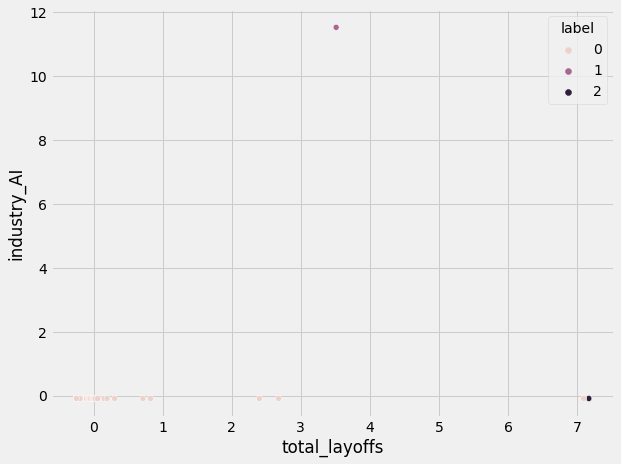

In [ ]:
plt.figure(figsize=(9,7))
sns.scatterplot(x='total_layoffs', y='industry_AI', data = scaled_df,
                hue = 'label')

## 각종 시각화

Text(0.5, 1.0, 'City 10')

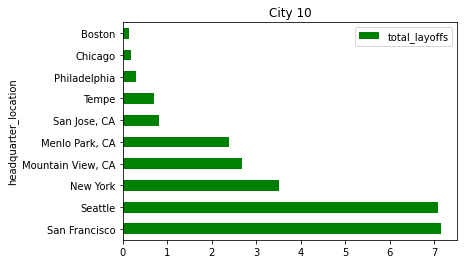

In [ ]:

scaled_df.head(10).iloc[:,:1].plot(kind = 'barh', color = 'green')
plt.title('City 10')

Text(0.5, 1.0, 'City 20')

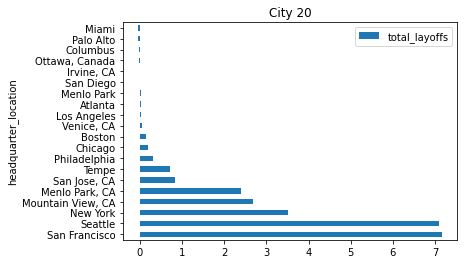

In [ ]:

scaled_df.head(20).iloc[:,:1].plot(kind = 'barh')
plt.title('City 20')

In [ ]:
industry_agg = industry_agg.sort_values(by='industry_AI', ascending = False)
industry_agg

,total_layoffs,industry_3D Printing,industry_AI,"industry_AI, Sales","industry_AI, analytics","industry_AI, big data","industry_AI, coding","industry_AI, enterprise software","industry_AI, health care","industry_AI, image recognition",...,"industry_retail, e-commerce","industry_robotics, AI","industry_security, enterprise software",industry_shipping and logistics,"industry_social impact, company benefits","industry_social impact, finance","industry_telecommunications, enterprise software",industry_telehealth,"industry_telehealth, wellness",industry_video games
headquarter_location,,,,,,,,,,,,,,,,,,,,,
New York,15609,0,100,0,120,0,0,0,0,0,...,0,0,0,0,100,0,0,0,0,0
"Alameda, CA",1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"Palo Alto, CA",103,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Philadelphia,2300,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Phoenix,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Greenville, SC",113,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Greater New York area,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"Grand Rapids, MI",227,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


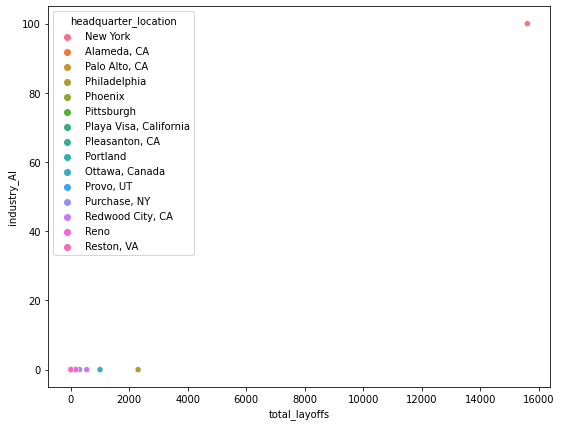

In [ ]:
plt.figure(figsize=(9,7))
sns.scatterplot(x='total_layoffs', y='industry_AI', data = industry_agg.head(15), hue = 'headquarter_location')

# 산점도의 각 카테고리 조합은 수십~수백개가 나올 수 있음

Text(0.5, 1.0, 'total layoffs City 20')

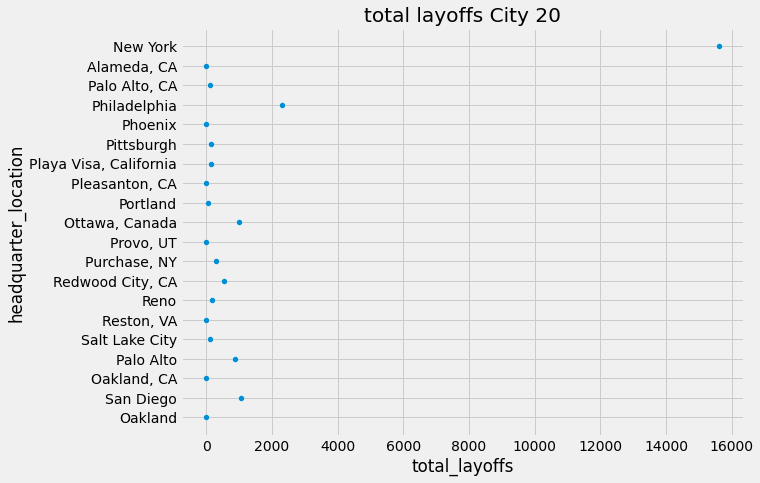

In [ ]:
plt.figure(figsize=(9,7))
sns.scatterplot(x='total_layoffs', y='headquarter_location', data = industry_agg.head(20))
plt.title('total layoffs City 20')
# scaled 하기 전

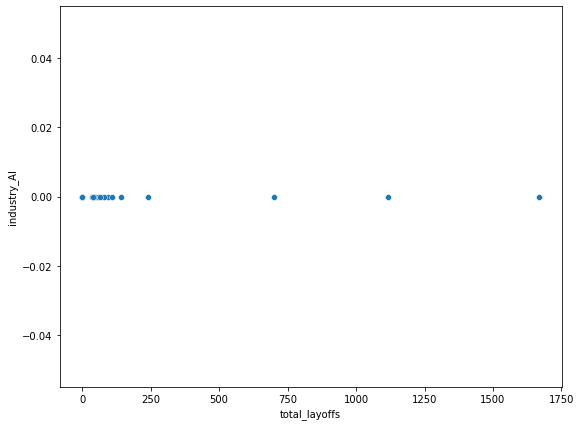

In [ ]:
plt.figure(figsize=(9,7))
sns.scatterplot(x='total_layoffs', y='industry_AI', data = industry_agg.head(20))